In [1]:
#import packages
import datacompy, pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import pylab

In [2]:
#import datasets
data = pd.read_csv("RealEstData11062019.csv", header=0, low_memory=False)
data2 = pd.read_csv("RealEstData11172020.csv", low_memory=False)

In [3]:
#Lets keep columns that are relevant to what we are wanting to predict here
data = data[['REAL_ESTATE_ID','Mailing_address1', 'Street_Number','Deeded_Acreage', 'Total_sale_Price', 'Total_Sale_Date',
             'Year_Built', 'HEATED_AREA', 'Story_Height', 'DESIGN_STYLE', 'PHYSICAL_CITY',
             'UTILITIES', 'BATH', 'TYPE_AND_USE']]

data2 = data2[['REAL_ESTATE_ID','Mailing_address1','Street_Number', 'Deeded_Acreage', 'Total_sale_Price', 'Total_Sale_Date',
             'Year_Built', 'HEATED_AREA', 'Story_Height', 'DESIGN_STYLE', 'PHYSICAL_CITY',
             'UTILITIES', 'BATH', 'TYPE_AND_USE']]

In [4]:
#rename some of the columns prior to merging
data = data.rename(columns = {'Total_sale_Price': 'Sale_Price1', 'Total_Sale_Date': 'Sale_Date1'}, inplace = False)
data2 = data2.rename(columns = {'Total_sale_Price': 'Sale_Price2', 'Total_Sale_Date': 'Sale_Date2'}, inplace = False)

In [5]:
## need to convert price variables into float
data2['Sale_Price2'] = data2['Sale_Price2'].str.replace(',', '').astype('float')
data['Sale_Price1'] = data['Sale_Price1'].str.replace(',', '').astype('float')

In [6]:
#filter the data to show only residential data
resident = data['TYPE_AND_USE'] <=10
data = data[resident]

resident2 = data2['TYPE_AND_USE'] <=10
data2 = data2[resident2]

**So in reviewing some of the data I found there are several duplicates based on Mailing_address1.  In further investigating this I found that most have a unique Street Number (Take a look at the example below).**

In [7]:
data.loc[data['Mailing_address1'] == 'MARVIN F POER & COMP']

,REAL_ESTATE_ID,Mailing_address1,Street_Number,Deeded_Acreage,Sale_Price1,Sale_Date1,Year_Built,HEATED_AREA,Story_Height,DESIGN_STYLE,PHYSICAL_CITY,UTILITIES,BATH,TYPE_AND_USE
329,367,MARVIN F POER & COMP,3806,18.28,0.0,NaN,1974,11871,E,A,RALEIGH,ALL,J,7.0
330,367,MARVIN F POER & COMP,3804,18.28,0.0,NaN,1974,11871,E,A,RALEIGH,ALL,J,7.0
331,367,MARVIN F POER & COMP,3810,18.28,0.0,NaN,1974,11871,E,A,RALEIGH,ALL,J,7.0
332,367,MARVIN F POER & COMP,3812,18.28,0.0,NaN,1974,11871,E,A,RALEIGH,ALL,J,7.0
333,367,MARVIN F POER & COMP,3816,18.28,0.0,NaN,1974,11871,E,A,RALEIGH,ALL,J,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353624,409247,MARVIN F POER & COMP,5741,13.35,41550000.0,6/22/2017,2013,116700,G,A,RALEIGH,ALL,J,9.0
353625,409247,MARVIN F POER & COMP,5721,13.35,41550000.0,6/22/2017,2013,101450,G,A,RALEIGH,ALL,J,9.0
353626,409247,MARVIN F POER & COMP,5130,13.35,41550000.0,6/22/2017,2013,82824,G,A,RALEIGH,ALL,J,9.0
365079,422301,MARVIN F POER & COMP,3939,0.00,0.0,NaN,1964,134491,H,A,RALEIGH,ALL,I,9.0


**Lets create a new field that is a combination of Street Number and Mailing Address to create a more unique 'Address'**

In [8]:
data.Street_Number = data.Street_Number.astype(str)
data2.Street_Number = data2.Street_Number.astype(str)

data['New_Address'] = data['Street_Number'] + '-' + data['Mailing_address1']
data2['New_Address'] = data2['Street_Number'] + '-' + data2['Mailing_address1']

In [9]:
#Reordering columns
data = data[['REAL_ESTATE_ID','New_Address', 'Mailing_address1', 'Street_Number','Deeded_Acreage',
             'Sale_Price1', 'Sale_Date1','Year_Built', 'HEATED_AREA', 'Story_Height', 
             'DESIGN_STYLE', 'PHYSICAL_CITY','UTILITIES', 'BATH', 'TYPE_AND_USE']]

data2 = data2[['REAL_ESTATE_ID','New_Address','Mailing_address1','Deeded_Acreage',
               'Sale_Price2', 'Sale_Date2','Year_Built', 'HEATED_AREA', 'Story_Height',
               'DESIGN_STYLE', 'PHYSICAL_CITY','UTILITIES', 'BATH', 'TYPE_AND_USE']]

In [10]:
duplicateRowsDF = data[data.duplicated(['New_Address'])]
duplicateRowsDF2 = data2[data2.duplicated(['New_Address'])]

In [11]:
duplicateRowsDF.shape

(3378, 15)

In [12]:
duplicateRowsDF['New_Address'].value_counts()

4700-12917 DURANT RD          164
211-1000 E CESAR CHAVEZ ST     96
0-ASSOCIA HRW INC              35
4801-4754 WALDEN POND DR       35
0-2108 CLARK AVE               28
                             ... 
3100-WATERTON ASSOC             1
4700-2404 MEMORY RIDGE DR       1
4404-900 HAYNES ST              1
9-PO BOX 12591                  1
203-PO BOX 426                  1
Name: New_Address, Length: 2114, dtype: int64

In [13]:
duplicateRowsDF2.shape

(3366, 14)

In [14]:
duplicateRowsDF2['New_Address'].value_counts()

4700-AMERICAN HOMESMITH NC LLC    164
211-1000 E CESAR CHAVEZ ST         96
4801-4754 WALDEN POND DR           35
0-ASSOCIA HRW INC                  35
0-2108 CLARK AVE                   28
                                 ... 
124-AMERICAN HOMES 4 RENT           1
404-404 CRICKENTREE DR              1
8644-8644 KINGS ARMS WAY            1
106-PO BOX 368                      1
203-PO BOX 426                      1
Name: New_Address, Length: 2105, dtype: int64

**So we have a over 3300 duplicates in both datasets, which is a far cry from the 30,000+ I was getting orignally.  This will still cause some issues when we merge the data.**

**Lets take a look at some of the examples here to see if there is anything esle that'll help in delimiting the duplicates here**

In [15]:
data2.loc[data2['New_Address'] == '4801-4754 WALDEN POND DR']

,REAL_ESTATE_ID,New_Address,Mailing_address1,Deeded_Acreage,Sale_Price2,Sale_Date2,Year_Built,HEATED_AREA,Story_Height,DESIGN_STYLE,PHYSICAL_CITY,UTILITIES,BATH,TYPE_AND_USE
98729,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4576,C,NaN,RALEIGH,NaN,J,7.0
98730,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4412,C,NaN,RALEIGH,NaN,J,7.0
98731,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,5558,C,NaN,RALEIGH,NaN,J,7.0
98732,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,5558,C,NaN,RALEIGH,NaN,J,7.0
98733,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,5558,C,NaN,RALEIGH,NaN,J,7.0
98734,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4372,C,NaN,RALEIGH,NaN,J,7.0
98735,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4576,C,NaN,RALEIGH,NaN,J,7.0
98736,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4576,C,NaN,RALEIGH,NaN,J,7.0
98737,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4576,C,NaN,RALEIGH,NaN,J,7.0
98738,111156,4801-4754 WALDEN POND DR,4754 WALDEN POND DR,22.08,0.0,NaN,1973,4576,C,NaN,RALEIGH,NaN,J,7.0


**Based off what I am seeing, it looks like we can safely remove the rest of the duplicates without causing too much harm, as from the examples I am seeing the only difference here is the Real Estate ID.**

In [16]:
data = data.drop_duplicates(subset='New_Address', keep='first')
data2 = data2.drop_duplicates(subset='New_Address', keep='first')

**Now lets compare the two datasets we want to merge and review some of the changes here**

In [17]:
#So now lets compare the two datasets.  Here I just want to see what data we have in comparing Sale price 
df1 = data.copy()
df2 = data2.copy()

compare = datacompy.Compare(
df1,
df2,
join_columns='Mailing_address1',  #You can also specify a list of columns
abs_tol=0, #Optional, defaults to 0
rel_tol=0, #Optional, defaults to 0
df1_name='Original', #Optional, defaults to 'df1'
df2_name='New' #Optional, defaults to 'df2'
)

compare.matches(ignore_extra_columns=False)

print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns    Rows
0  Original       15  326239
1       New       14  333761

Column Summary
--------------

Number of columns in common: 12
Number of columns in Original but not in New: 3
Number of columns in New but not in Original: 2

Row Summary
-----------

Matched on: mailing_address1
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 311,208
Number of rows in Original but not in New: 15,031
Number of rows in New but not in Original: 22,553

Number of rows with some compared columns unequal: 33,939
Number of rows with all compared columns equal: 277,269

Column Comparison
-----------------

Number of columns compared with some values unequal: 11
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 106,229

Columns with Unequal Values or Types
------------------------------------

            C

**We can see from the report that this generates there are several changes here from the first dataset to the second.  For example, there are changes to the acerage reported for some addresses from 2019 to 2020 (could be from rezoning/selling off part of that property perhaps).**  

**So before we merge I am going to only keep a few rows from the first dataset and use the more up to date information from the second.** 

In [18]:
data = data[['New_Address', 'Sale_Price1', 'Sale_Date1']]
data.head()

,New_Address,Sale_Price1,Sale_Date1
18,2457-2457 BERTIE DR,34500.0,1/1/1974
19,2848-2848 PROVIDENCE RD,35500.0,5/18/1983
20,409-2124 RIDGE RD,0.0,NaN
21,540-622 SPRINGFORK DR,37500.0,9/16/2004
22,208-1000 GOBLET LN,210000.0,6/27/2018


**Also before we merge lets take a look at the shape of our datasets, so after the merge we can compare to make sure there isnt anything crazy going on (like duplicating rows for example).**

In [19]:
data.shape

(326239, 3)

In [20]:
data2.shape

(333761, 14)

In [21]:
#now lets join our dataset
home_data = pd.merge(data, data2, on=['New_Address'], how='left')
home_data.head()

,New_Address,Sale_Price1,Sale_Date1,REAL_ESTATE_ID,Mailing_address1,Deeded_Acreage,Sale_Price2,Sale_Date2,Year_Built,HEATED_AREA,Story_Height,DESIGN_STYLE,PHYSICAL_CITY,UTILITIES,BATH,TYPE_AND_USE
0,2457-2457 BERTIE DR,34500.0,1/1/1974,19.0,2457 BERTIE DR,0.21,34500.0,1/1/1974,1964.0,1828.0,A,I,RALEIGH,ALL,C,1.0
1,2848-2848 PROVIDENCE RD,35500.0,5/18/1983,20.0,2848 PROVIDENCE RD,0.46,35500.0,5/18/1983,1970.0,1240.0,A,A,RALEIGH,E,A,1.0
2,409-2124 RIDGE RD,0.0,NaN,21.0,2124 RIDGE RD,0.43,0.0,NaN,1999.0,1037.0,A,A,RALEIGH,ALL,C,1.0
3,540-622 SPRINGFORK DR,37500.0,9/16/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,208-1000 GOBLET LN,210000.0,6/27/2018,23.0,1000 GOBLET LN,0.79,210000.0,6/27/2018,1916.0,2440.0,C,E,RALEIGH,ALL,J,2.0


In [22]:
home_data.shape

(326239, 16)

**This looks good, it matches the row count in our original dataset**

In [23]:
#now lets create our new target vairable of price difference
home_data['Price_Diff'] = home_data['Sale_Price2'] - home_data['Sale_Price1']
home_data.head()

,New_Address,Sale_Price1,Sale_Date1,REAL_ESTATE_ID,Mailing_address1,Deeded_Acreage,Sale_Price2,Sale_Date2,Year_Built,HEATED_AREA,Story_Height,DESIGN_STYLE,PHYSICAL_CITY,UTILITIES,BATH,TYPE_AND_USE,Price_Diff
0,2457-2457 BERTIE DR,34500.0,1/1/1974,19.0,2457 BERTIE DR,0.21,34500.0,1/1/1974,1964.0,1828.0,A,I,RALEIGH,ALL,C,1.0,0.0
1,2848-2848 PROVIDENCE RD,35500.0,5/18/1983,20.0,2848 PROVIDENCE RD,0.46,35500.0,5/18/1983,1970.0,1240.0,A,A,RALEIGH,E,A,1.0,0.0
2,409-2124 RIDGE RD,0.0,NaN,21.0,2124 RIDGE RD,0.43,0.0,NaN,1999.0,1037.0,A,A,RALEIGH,ALL,C,1.0,0.0
3,540-622 SPRINGFORK DR,37500.0,9/16/2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,208-1000 GOBLET LN,210000.0,6/27/2018,23.0,1000 GOBLET LN,0.79,210000.0,6/27/2018,1916.0,2440.0,C,E,RALEIGH,ALL,J,2.0,0.0


In [24]:
#Also want to create variable for number of months between sale
home_data['Sale_Date1'] =  pd.to_datetime(home_data['Sale_Date1'], infer_datetime_format=True)
home_data['Sale_Date2'] =  pd.to_datetime(home_data['Sale_Date2'], infer_datetime_format=True)

#calculating number of months between sale dates
home_data['date_diff'] = (home_data.Sale_Date2 - home_data.Sale_Date1)/np.timedelta64(1, 'M')
home_data = home_data.drop(columns=['Sale_Date1', 'Sale_Date2'])

home_data.head()

,New_Address,Sale_Price1,REAL_ESTATE_ID,Mailing_address1,Deeded_Acreage,Sale_Price2,Year_Built,HEATED_AREA,Story_Height,DESIGN_STYLE,PHYSICAL_CITY,UTILITIES,BATH,TYPE_AND_USE,Price_Diff,date_diff
0,2457-2457 BERTIE DR,34500.0,19.0,2457 BERTIE DR,0.21,34500.0,1964.0,1828.0,A,I,RALEIGH,ALL,C,1.0,0.0,0.0
1,2848-2848 PROVIDENCE RD,35500.0,20.0,2848 PROVIDENCE RD,0.46,35500.0,1970.0,1240.0,A,A,RALEIGH,E,A,1.0,0.0,0.0
2,409-2124 RIDGE RD,0.0,21.0,2124 RIDGE RD,0.43,0.0,1999.0,1037.0,A,A,RALEIGH,ALL,C,1.0,0.0,NaN
3,540-622 SPRINGFORK DR,37500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,208-1000 GOBLET LN,210000.0,23.0,1000 GOBLET LN,0.79,210000.0,1916.0,2440.0,C,E,RALEIGH,ALL,J,2.0,0.0,0.0


**If you notice from the output above, we can see where Price difference is 0.  Lets remove these rows as no increase (or decrease) in Price doesnt tell us anything in answering our business problem**

In [25]:
#filtering out rows where price diff is set to 0
not_zero_price = home_data['Price_Diff'] !=0
home_data = home_data[not_zero_price]

In [26]:
#Review sum of null values.
home_data.isnull().sum()

New_Address             0
Sale_Price1             0
REAL_ESTATE_ID      16124
Mailing_address1    16124
Deeded_Acreage      16124
Sale_Price2         16124
Year_Built          16124
HEATED_AREA         16124
Story_Height        16126
DESIGN_STYLE        16126
PHYSICAL_CITY       16126
UTILITIES           16227
BATH                16126
TYPE_AND_USE        16124
Price_Diff          16124
date_diff           16711
dtype: int64

In [27]:
#calculating the percentage of missing values for each feature
NAN = [(c, home_data[c].isnull().mean()*100) for c in home_data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

NAN = NAN[NAN.percentage > 30]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
15,date_diff,56.201655
11,UTILITIES,54.573888
8,Story_Height,54.234210
9,DESIGN_STYLE,54.234210
10,PHYSICAL_CITY,54.234210
12,BATH,54.234210
2,REAL_ESTATE_ID,54.227484
3,Mailing_address1,54.227484
4,Deeded_Acreage,54.227484
5,Sale_Price2,54.227484


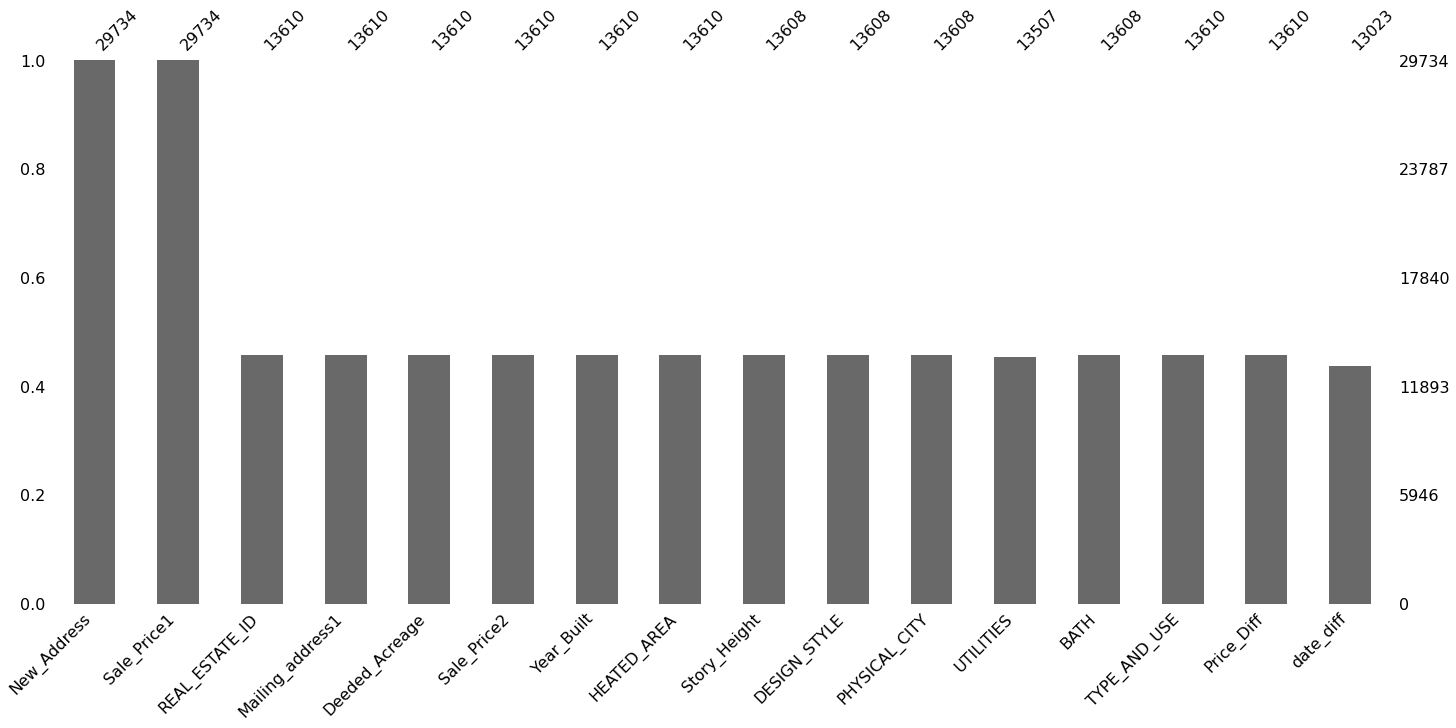

In [28]:
#lets have a look visually at the missing values in our dataframe
import missingno as msno 

msno.bar(home_data)

Some else pretty cool I found using this package is to look at the correlation between the missing values

* A value near -1 means if one variable appears then the other variable is very likely to be missing.
* A value near 0 means there is no dependence between the occurrence of missing values of two variables.
* A value near 1 means if one variable appears then the other variable is very likely to be present.

Here is a link to some documentation on this: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

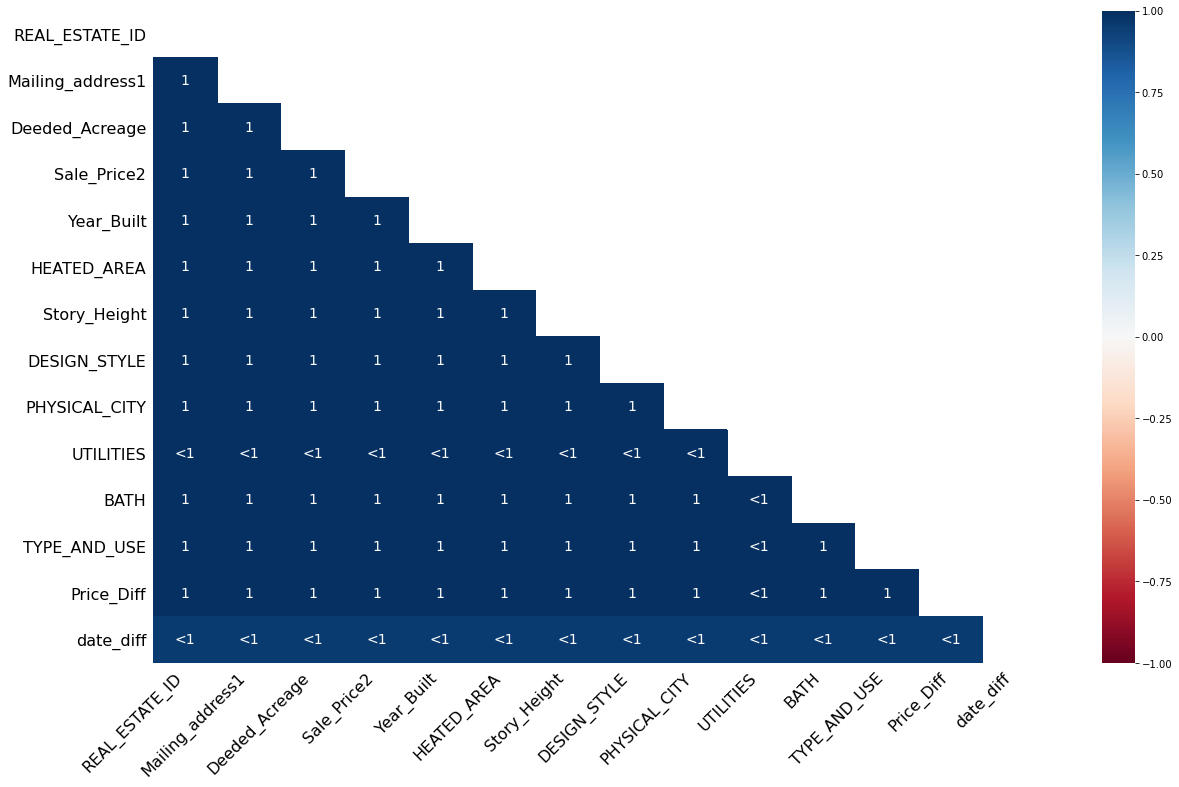

In [29]:
msno.heatmap(home_data)

In [30]:
#Going to go ahead and drop rows with Real Estate ID empty.  

home_data = home_data.dropna(subset=['REAL_ESTATE_ID'])

In [31]:
#Review sum of null values once again
home_data.isnull().sum()

New_Address           0
Sale_Price1           0
REAL_ESTATE_ID        0
Mailing_address1      0
Deeded_Acreage        0
Sale_Price2           0
Year_Built            0
HEATED_AREA           0
Story_Height          2
DESIGN_STYLE          2
PHYSICAL_CITY         2
UTILITIES           103
BATH                  2
TYPE_AND_USE          0
Price_Diff            0
date_diff           587
dtype: int64

In [32]:
#fill in missing values remaining
home_data.UTILITIES.fillna('Other',inplace=True)
home_data.Story_Height.fillna('Other', inplace=True)
home_data.DESIGN_STYLE.fillna('Other', inplace=True)
home_data.BATH.fillna('Other', inplace=True)
home_data.PHYSICAL_CITY.fillna('Other', inplace=True)
home_data.date_diff.fillna(0,inplace=True)

In [33]:
#recheck
home_data.isnull().sum()

New_Address         0
Sale_Price1         0
REAL_ESTATE_ID      0
Mailing_address1    0
Deeded_Acreage      0
Sale_Price2         0
Year_Built          0
HEATED_AREA         0
Story_Height        0
DESIGN_STYLE        0
PHYSICAL_CITY       0
UTILITIES           0
BATH                0
TYPE_AND_USE        0
Price_Diff          0
date_diff           0
dtype: int64

In [34]:
home_data.describe(percentiles=[0.01,0.05,0.1,0.25,0.75,0.9,0.95,0.99])

,Sale_Price1,REAL_ESTATE_ID,Deeded_Acreage,Sale_Price2,Year_Built,HEATED_AREA,TYPE_AND_USE,Price_Diff,date_diff
count,1.361000e+04,13610.000000,13610.000000,1.361000e+04,13610.000000,13610.000000,13610.000000,1.361000e+04,13610.000000
mean,3.869902e+05,254332.565834,0.470518,4.834841e+05,1996.935268,2426.353711,1.025129,9.649392e+04,110.989158
std,3.264194e+06,120130.482749,1.848503,3.045620e+06,17.190486,2800.806413,0.400731,8.435604e+05,101.783510
min,0.000000e+00,62.000000,0.000000,0.000000e+00,1852.000000,0.000000,1.000000,-1.771560e+07,-565.005442
1%,0.000000e+00,9084.230000,0.000000,6.000000e+03,1935.000000,951.090000,1.000000,-1.670000e+05,0.000000
5%,4.450000e+04,41585.000000,0.030000,1.700000e+05,1964.000000,1160.000000,1.000000,4.000000e+03,3.144212
10%,1.070000e+05,81068.300000,0.040000,1.970000e+05,1975.000000,1296.000000,1.000000,1.850000e+04,20.465307
25%,1.600000e+05,163689.750000,0.140000,2.480000e+05,1990.000000,1624.000000,1.000000,4.250000e+04,39.787265
50%,2.350000e+05,266488.500000,0.230000,3.250000e+05,2001.000000,2171.000000,1.000000,7.200000e+04,74.662724
75%,3.360000e+05,349510.250000,0.410000,4.350000e+05,2008.000000,2865.000000,1.000000,1.163750e+05,163.518758


**So in examining this we can see that there are some variables here that have a min value of 0.00, that don't make a whole lot of sense.  For example a house with 0.00 heated area, and a house with 0 units**

**Lets filter out the observations that fall under the 1% for Heated Area and Units**  

In [35]:
# Filter out the Homes that fall under 1% Heated Area: 951
filter1 = home_data.HEATED_AREA > 951
# Use the filters to create a new DataFrame
home_data = home_data[filter1].copy()

In [36]:
home_data.shape

(13473, 16)

In [37]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13473 entries, 32 to 326140
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   New_Address       13473 non-null  object 
 1   Sale_Price1       13473 non-null  float64
 2   REAL_ESTATE_ID    13473 non-null  float64
 3   Mailing_address1  13473 non-null  object 
 4   Deeded_Acreage    13473 non-null  float64
 5   Sale_Price2       13473 non-null  float64
 6   Year_Built        13473 non-null  float64
 7   HEATED_AREA       13473 non-null  float64
 8   Story_Height      13473 non-null  object 
 9   DESIGN_STYLE      13473 non-null  object 
 10  PHYSICAL_CITY     13473 non-null  object 
 11  UTILITIES         13473 non-null  object 
 12  BATH              13473 non-null  object 
 13  TYPE_AND_USE      13473 non-null  float64
 14  Price_Diff        13473 non-null  float64
 15  date_diff         13473 non-null  float64
dtypes: float64(9), object(7)
memory usage:

Lets Map the object variables to reflect the mapping provided here: http://www.wakegov.com/tax/realestate/Documents/CodeDescriptions.pdf

In [38]:
#mapping for Story Height
bin_map_sh = {'A': 'One Story', 'B': '1.5 Story', 'C': 'Two Story', 'D': '2.5 Story', 'E': 'Three Story', 
              'I': '1.75 Story', 'K': '1.63 Story', 'J': '1.4 Story', 'L': '1.88 Story', 'M': '2.4 Story',
              'N': '2.63 Story'}

#mapping for Design Style
bin_map_ds = {'A': 'Conventional', 'D': 'Condo', 'B': 'Duplex', 'C': 'Townhouse', 'I': 'Split Level', 'K': 'Contemporary'
              , 'G': 'Ranch', 'E': 'Conversion', '0':'Modular', 'J': 'Split Foyer', 'F': 'Colonial',
               'L': 'Log'}

#mapping for Utilities
bin_map_UTIL = {'ALL': 'All', 'WSE': 'Water Sewer Electic', 'E': 'Eletric', 'WE': 'Water & Electric', 
                'WSG': 'Water Sewer Gas', 'GE': 'Gas & Electric', 'Other':'Other', 'SGE': 'Sewer Gas Electric', 
                'WS': 'Water Sewer', 'WGE': 'Water Gas Electric', 'W': 'Water', 'SE': 'Sewer Electric', 'G': 'Gas',
                'S':'Sewer', 'WG': 'Water Gas'}

#mapping for Bath
bin_map_Bath = {'C': 'Two Bath', 'J':'Number of Fixtures', 'B': '1.5 Bath', 'F': '3.5 Bath', 'E': 'Three Bath', 
                'D': '2.5 Bath', 'A': 'One Bath', 'I':'Adeqaute', 'H': 'No Plumbing', 'Other':'Other'}

In [39]:
home_data['UTILITIES'] = home_data['UTILITIES'].map(bin_map_UTIL)
home_data['Story_Height'] = home_data['Story_Height'].map(bin_map_sh)
home_data['DESIGN_STYLE'] = home_data['DESIGN_STYLE'].map(bin_map_ds)
home_data['BATH'] = home_data['BATH'].map(bin_map_Bath)


**Lets take a look at some trends in our data.  This will help in creating some groups prior to modeling for some of our object variables.**

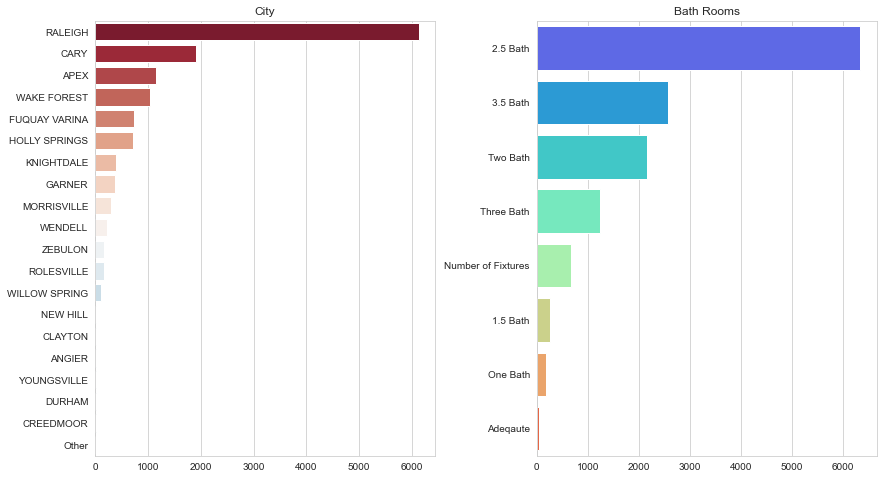

In [40]:
#Lets have a look to see if we can find any trends within our data that may be interesting

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style("whitegrid")

f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = home_data['PHYSICAL_CITY'].value_counts()[:20].to_frame()

sns.barplot(cnt['PHYSICAL_CITY'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('City')

cnt = home_data['BATH'].value_counts()[:20].to_frame()

sns.barplot(cnt['BATH'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Bath Rooms')
plt.subplots_adjust(wspace=0.3)

**So we can see here that for City we have Raleigh, Cary, Apex and a few others with some decent data.  I would say after Holly Springs, we can group the rest of the observations together under Other.**

**Same for Baths, I'll keep the top 4 and then we can group the rest.**  

In [41]:
home_data.BATH.unique()

array(['Two Bath', 'Three Bath', '2.5 Bath', '1.5 Bath', 'One Bath',
       '3.5 Bath', 'Number of Fixtures', 'Adeqaute'], dtype=object)

In [42]:
home_data.PHYSICAL_CITY.replace(['ZEBULON','WENDELL', 'CREEDMOOR', 'MORRISVILLE', 
                                 'ROLESVILLE', 'NEW HILL', 'WILLOW SPRING', 'CLAYTON', 'YOUNGSVILLE', 'Other',
                                 'ANGIER', 'DURHAM'],'Other',inplace=True)

home_data.BATH.replace(['1.5 Bath', 'One Bath','Number of Fixtures', 'Adeqaute'], 'Other', inplace=True)

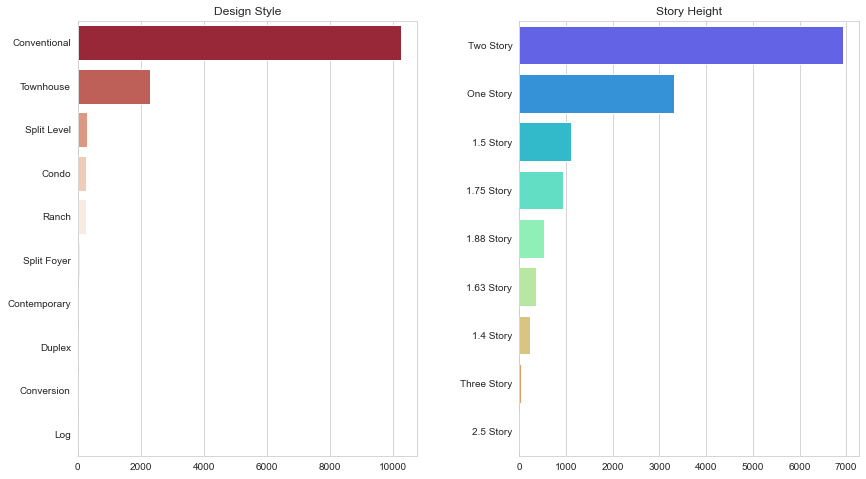

In [43]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = home_data['DESIGN_STYLE'].value_counts()[:20].to_frame()

sns.barplot(cnt['DESIGN_STYLE'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Design Style')

cnt = home_data['Story_Height'].value_counts()[:20].to_frame()

sns.barplot(cnt['Story_Height'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Story Height')
plt.subplots_adjust(wspace=0.3)

**Same concept here.  I will take the top 4 Design styles and then group the rest and the Top 5 Story heights and group the rest.** 

In [44]:
home_data.DESIGN_STYLE.replace(['Contemporary', 'Ranch', 'Condo', 'Split Level', 'Split Foyer', 'Conversion',
                                'Duplex', 'nan','Log'],'Other',inplace=True)

home_data.Story_Height.replace(['1.4 Story', '1.63 Story', '2.5 Story','Three Story'], 'Other', inplace=True)

**Lets evaluate our target variable to determine if we need to normalize our data at all**

In [45]:
#Lets compute some descriptive stats of our target 
home_data.Price_Diff.describe()

count    1.347300e+04
mean     9.697553e+04
std      8.476808e+05
min     -1.771560e+07
25%      4.250000e+04
50%      7.250000e+04
75%      1.170000e+05
max      4.880000e+07
Name: Price_Diff, dtype: float64

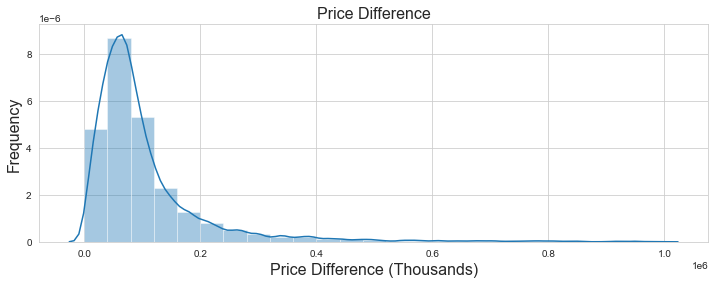

In [62]:
#Before we begin modeling lets just have a look at our Target variable
plt.figure(figsize=(12,4))
ax = sns.distplot(home_data['Price_Diff'], bins = 25, hist_kws={"range": [0,1000000]}, kde_kws={"clip":(0,1000000)})
plt.xlabel('Price Difference (Thousands)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Price Difference', fontsize=16);

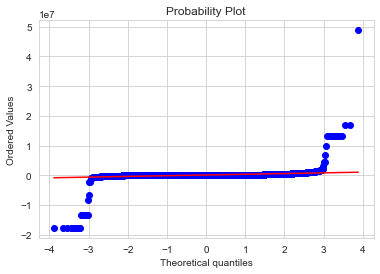

In [63]:
stats.probplot(home_data.Price_Diff, dist="norm", plot=pylab)
pylab.show()

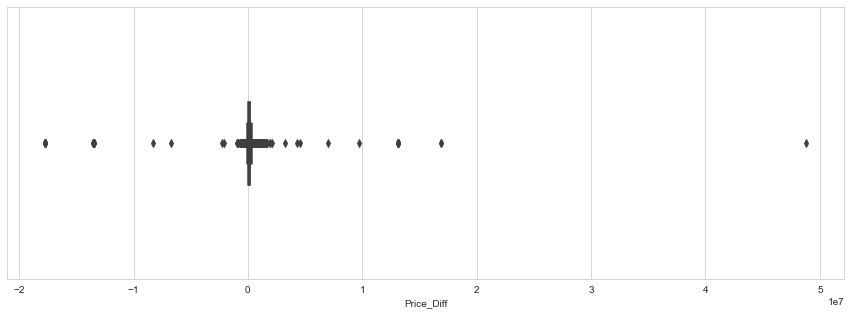

In [64]:
#evaluate outliers
plt.figure(figsize=(15,5))
sns.boxplot(home_data.Price_Diff, linewidth=2.5, width=.3)

**Lets use the zscore funtion here to help in identifying outliers.** 

**Zscore is used to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. It looks into the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution**

**Here I will use the standard threshold of 3 deviations to the left or right of the mean to call out outliers**

In [65]:
z = np.abs(stats.zscore(home_data.Price_Diff))

threshold = 3
print(np.where(z > 3))

(array([  143,   207,   432,  1031,  1032,  1033,  1034,  1035,  1036,
        1037,  1038,  1192,  1310,  1634,  1635,  1862,  4135,  5659,
        5660,  5661,  5662,  5663,  5664,  5665,  5666,  5667,  5668,
        5669,  8870, 13194, 13195, 13196, 13197, 13198, 13199, 13200,
       13201, 13202]),)


In [66]:
#Lets use Z score with a threshold of 3 to filter our data out
home_data['price_zscore'] = np.array((home_data['Price_Diff'] - home_data['Price_Diff'].mean())/home_data['Price_Diff'].std())
zscore_3 = abs(home_data['price_zscore']) < 3
home_data = home_data[zscore_3]

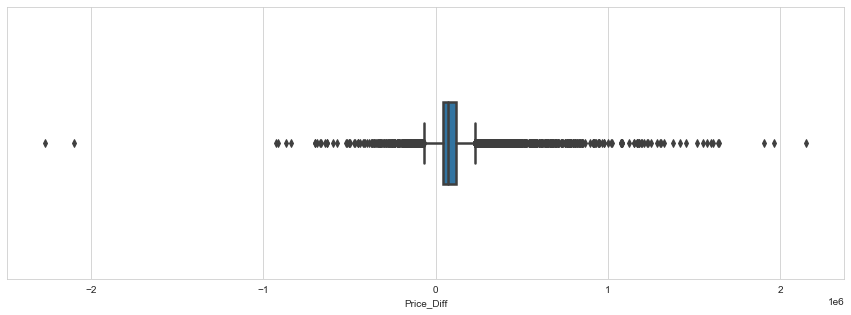

In [67]:
#lets look back at our box plot
plt.figure(figsize=(15,5))
sns.boxplot(home_data.Price_Diff, linewidth=2.5, width=.3)

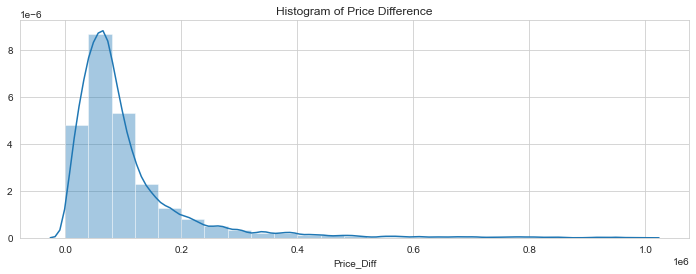

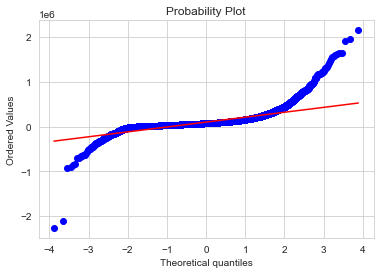

In [68]:
#Before we begin modeling lets just have a look at our Target variable
plt.figure(figsize=(12,4))
ax = sns.distplot(home_data['Price_Diff'], bins = 25, hist_kws={"range": [0,1000000]}, kde_kws={"clip":(0,1000000)})
plt.title('Histogram of Price Difference');

plt.show()
stats.probplot(home_data['Price_Diff'], dist="norm", plot=pylab)
pylab.show()

/Users/brianadams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


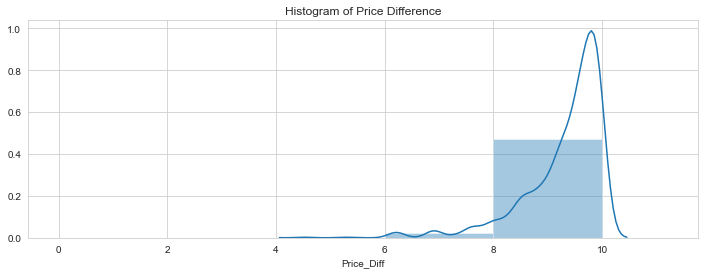

/Users/brianadams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


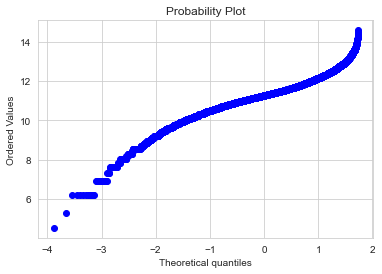

In [69]:
# What happens when log transformation?
plt.figure(figsize=(12,4))
ax = sns.distplot(np.log(home_data['Price_Diff']), bins = 5, hist_kws={"range": [0,10]}, kde_kws={"clip":(0,10)})
plt.title('Histogram of Price Difference');
plt.show()
stats.probplot(np.log(home_data['Price_Diff']), dist="norm", plot=pylab)
pylab.show()

/Users/brianadams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


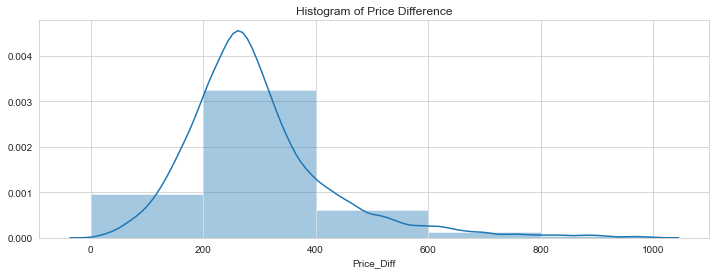

/Users/brianadams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


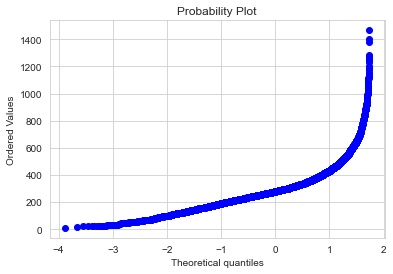

In [70]:
# What happens when sqrt transformation?
plt.figure(figsize=(12,4))
ax = sns.distplot(np.sqrt(home_data['Price_Diff']), bins = 5, hist_kws={"range": [0,1000]}, kde_kws={"clip":(0,1000)})
plt.title('Histogram of Price Difference');
plt.show()
stats.probplot(np.sqrt(home_data['Price_Diff']), dist="norm", plot=pylab)
pylab.show()

**So using Sq Rt gives us a decent normalization of our target variable.  I'll go ahead and create target as the sq root value of Price Difference to try and normalize a data a bit more.**

In [71]:
home_data['target'] = np.sqrt(home_data['Price_Diff'])
home_data.head()

/Users/brianadams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,New_Address,Sale_Price1,REAL_ESTATE_ID,Mailing_address1,Deeded_Acreage,Sale_Price2,Year_Built,HEATED_AREA,Story_Height,DESIGN_STYLE,PHYSICAL_CITY,UTILITIES,BATH,TYPE_AND_USE,Price_Diff,date_diff,price_zscore,target
32,1700-1700 RANKIN ST,255000.0,62.0,1700 RANKIN ST,0.15,350000.0,1949.0,1020.0,One Story,Conventional,RALEIGH,All,Two Bath,1.0,95000.0,51.910717,-0.002331,308.220700
414,3428-3428 BELLEVUE RD,565000.0,659.0,3428 BELLEVUE RD,0.22,647500.0,1996.0,2176.0,Two Story,Conventional,RALEIGH,All,Three Bath,1.0,82500.0,50.103698,-0.017077,287.228132
448,1112-1112 WHIPPOORWILL LN,157000.0,704.0,1112 WHIPPOORWILL LN,0.25,331000.0,1974.0,1575.0,One Story,Other,RALEIGH,All,Two Bath,1.0,174000.0,183.921641,0.090865,417.133072
465,5933-5933 WINTERGREEN DR,29000.0,721.0,5933 WINTERGREEN DR,0.23,306500.0,1973.0,1839.0,One Story,Other,RALEIGH,All,Two Bath,1.0,277500.0,570.952176,0.212963,526.782688
565,109-109 ANNANDALE DR,50000.0,840.0,109 ANNANDALE DR,0.61,800000.0,1970.0,3579.0,One Story,Other,CARY,All,Three Bath,1.0,750000.0,586.229697,0.770366,866.025404


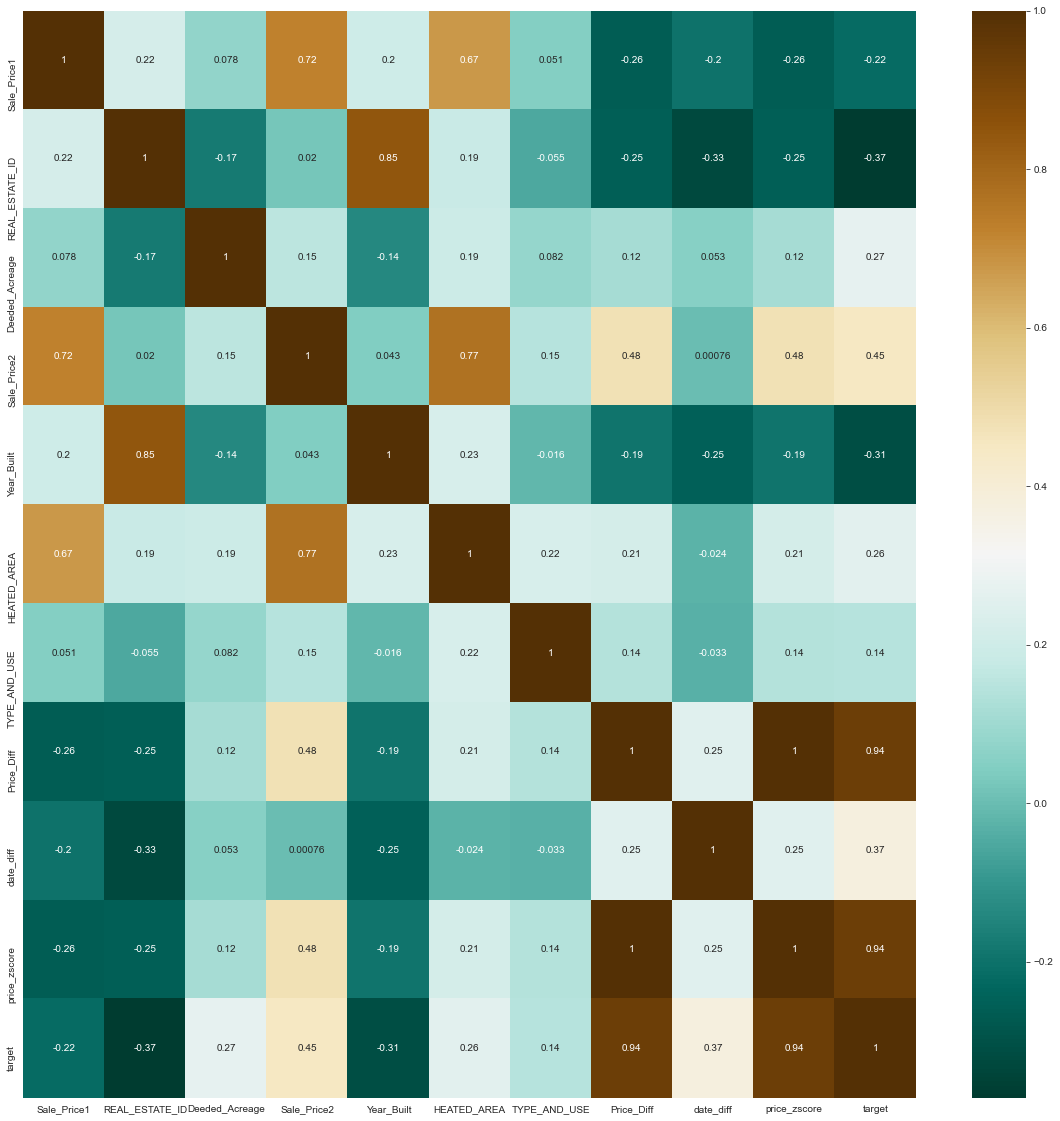

In [72]:
#now lets run a correlation matrix to look at feature relationships
import seaborn as sns

corrmat = home_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(home_data[top_corr_features].corr(),annot=True,cmap="BrBG_r")

### Modeling

**Now we are ready to begin modeling.  Lets begin by taking a look at the relationship between some of our features against our target.**

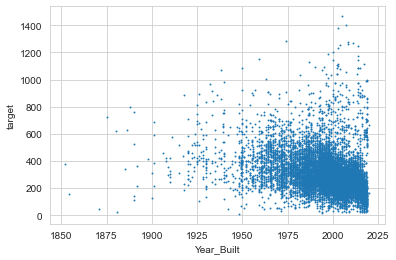

In [73]:
#Year Built
home_data.plot.scatter(x='Year_Built', y='target', s=0.8)

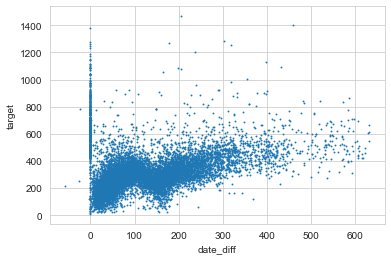

In [74]:
#Date Diff, which is months between sale dates
home_data.plot.scatter(x='date_diff', y='target', s=0.8)

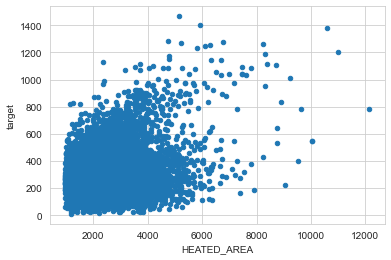

In [75]:
#Sq Footage
home_data.plot.scatter(x='HEATED_AREA', y='target')

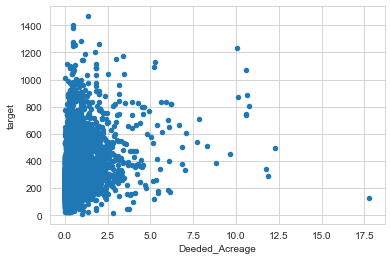

In [76]:
#Acreage
home_data.plot.scatter(x='Deeded_Acreage', y='target')

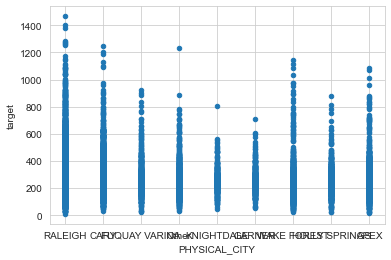

In [77]:
#City
home_data.plot.scatter(x='PHYSICAL_CITY', y='target')

In [79]:
from statsmodels.formula.api import ols

house_model = ols("target ~ HEATED_AREA + Deeded_Acreage + Year_Built", 
                  data=home_data).fit()
house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1268.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:52:49   Log-Likelihood:                -80146.
No. Observations:               12879   AIC:                         1.603e+05
Df Residuals:                   12875   BIC:                         1.603e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6088.8073    132.895     45.817      0.000    5828.313    6349.301
HEATED_AREA        0.0431      0.001     36.093      0.000       0.041       0.045
Deeded_Acreage    31.2059      1.757     17.759      0.000      27.762      34.650
Year_Built        -2.9561      0.067    -44.228      0.000      -3.087      -2.825
==============================================================================
Omnibus:                     3632.024   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20747.108
Skew:                           1.234   Prob(JB):                         0.00
Kurtosis:                       8.707   Cond. No.                     3.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
house_model2 = ols("target ~ HEATED_AREA + Deeded_Acreage + Year_Built + C(PHYSICAL_CITY)", 
                  data=home_data).fit()
house_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     384.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:48:03   Log-Likelihood:                -79982.
No. Observations:               12879   AIC:                         1.600e+05
Df Residuals:                   12867   BIC:                         1.601e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          5570.0086    138.376     40.253      0.000    5298.772    5841.245
C(PHYSICAL_CITY)[T.CARY]             27.8639      4.654      5.988      0.000      18.742      36.986
C(PHYSICAL_CITY)[T.FUQUAY VARINA]   -10.5836      5.807     -1.823      0.068     -21.966       0.799
C(PHYSICAL_CITY)[T.GARNER]          -38.1878      7.333     -5.208      0.000     -52.561     -23.815
C(PHYSICAL_CITY)[T.HOLLY SPRINGS]   -14.4388      5.876     -2.457      0.014     -25.957      -2.921
C(PHYSICAL_CITY)[T.KNIGHTDALE]      -14.2763      7.276     -1.962      0.050     -28.538      -0.014
C(PHYSICAL_CITY)[T.Other]           -21.9632      5.373     -4.087      0.000     -32.496     -11.431
C(PHYSICAL_CITY)[T.RALEIGH]           9.2572      4.044      2.289      0.022       1.330      17.184
C(PHYSICAL_CITY)[T.WAKE FOREST]     -44.5287      5.348     -8.325      0.000     -55.013     -34.045
HEATED_AREA                           0.0412      0.001     34.223      0.000       0.039       0.044
Deeded_Acreage                       36.1608      1.767     20.459      0.000      32.696      39.625
Year_Built                           -2.6952      0.069    -38.869      0.000      -2.831      -2.559
==============================================================================
Omnibus:                     3634.055   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21820.768
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                       8.892   Cond. No.                     4.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
house_model3 = ols("target ~ HEATED_AREA + Deeded_Acreage + Year_Built + C(PHYSICAL_CITY) + C(BATH)", 
                  data=home_data).fit()
house_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     289.3
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:52:46   Log-Likelihood:                -79941.
No. Observations:               12879   AIC:                         1.599e+05
Df Residuals:                   12863   BIC:                         1.600e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          5227.0667    149.782     34.898      0.000    4933.473    5520.661
C(PHYSICAL_CITY)[T.CARY]             26.0982      4.647      5.616      0.000      16.989      35.208
C(PHYSICAL_CITY)[T.FUQUAY VARINA]   -13.3128      5.805     -2.293      0.022     -24.691      -1.934
C(PHYSICAL_CITY)[T.GARNER]          -40.7212      7.317     -5.565      0.000     -55.064     -26.378
C(PHYSICAL_CITY)[T.HOLLY SPRINGS]   -14.7616      5.859     -2.520      0.012     -26.245      -3.278
C(PHYSICAL_CITY)[T.KNIGHTDALE]      -18.2320      7.272     -2.507      0.012     -32.486      -3.978
C(PHYSICAL_CITY)[T.Other]           -24.0055      5.364     -4.475      0.000     -34.520     -13.491
C(PHYSICAL_CITY)[T.RALEIGH]           8.1780      4.035      2.027      0.043       0.269      16.087
C(PHYSICAL_CITY)[T.WAKE FOREST]     -44.3586      5.335     -8.315      0.000     -54.816     -33.901
C(BATH)[T.3.5 Bath]                 -26.8232      3.588     -7.475      0.000     -33.857     -19.790
C(BATH)[T.Other]                     10.6654      4.277      2.493      0.013       2.281      19.050
C(BATH)[T.Three Bath]                -8.7346      3.917     -2.230      0.026     -16.413      -1.057
C(BATH)[T.Two Bath]                  14.3169      3.302      4.336      0.000       7.844      20.789
HEATED_AREA                           0.0494      0.002     32.400      0.000       0.046       0.052
Deeded_Acreage                       34.8478      1.771     19.680      0.000      31.377      38.319
Year_Built                           -2.5310      0.075    -33.845      0.000      -2.678      -2.384
==============================================================================
Omnibus:                     3658.581   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21922.717
Skew:                           1.229   Prob(JB):                         0.00
Kurtosis:                       8.900   Cond. No.                     4.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
house_model4 = ols("target ~ HEATED_AREA + Deeded_Acreage + Year_Built + C(PHYSICAL_CITY)\
                   + C(BATH) + date_diff + C(Story_Height)", 
                  data=home_data).fit()
house_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:57:19   Log-Likelihood:                -79270.
No. Observations:               12879   AIC:                         1.586e+05
Df Residuals:                   12857   BIC:                         1.587e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3990.8280    148.605     26.855      0.000    3699.540    4282.116
C(PHYSICAL_CITY)[T.CARY]             19.0289      4.417      4.308      0.000      10.371      27.687
C(PHYSICAL_CITY)[T.FUQUAY VARINA]   -14.3181      5.525     -2.591      0.010     -25.149      -3.488
C(PHYSICAL_CITY)[T.GARNER]          -46.3757      6.959     -6.664      0.000     -60.016     -32.735
C(PHYSICAL_CITY)[T.HOLLY SPRINGS]   -13.1175      5.564     -2.358      0.018     -24.023      -2.212
C(PHYSICAL_CITY)[T.KNIGHTDALE]      -21.1236      6.906     -3.059      0.002     -34.661      -7.586
C(PHYSICAL_CITY)[T.Other]           -24.5735      5.097     -4.821      0.000     -34.564     -14.583
C(PHYSICAL_CITY)[T.RALEIGH]           4.9875      3.833      1.301      0.193      -2.526      12.501
C(PHYSICAL_CITY)[T.WAKE FOREST]     -41.8541      5.074     -8.249      0.000     -51.800     -31.909
C(BATH)[T.3.5 Bath]                 -17.9720      3.435     -5.232      0.000     -24.705     -11.239
C(BATH)[T.Other]                      2.0539      4.141      0.496      0.620      -6.063      10.171
C(BATH)[T.Three Bath]                -8.6286      3.813     -2.263      0.024     -16.103      -1.155
C(BATH)[T.Two Bath]                   0.9458      3.873      0.244      0.807      -6.646       8.538
C(Story_Height)[T.1.75 Story]       -14.5582      5.224     -2.787      0.005     -24.797      -4.319
C(Story_Height)[T.1.88 Story]       -27.7994      6.274     -4.431      0.000     -40.098     -15.501
C(Story_Height)[T.One Story]          8.6321      4.532      1.905      0.057      -0.251      17.515
C(Story_Height)[T.Other]            -13.3968      5.915     -2.265      0.024     -24.990      -1.803
C(Story_Height)[T.Two Story]         -7.4796      3.858     -1.939      0.053     -15.042       0.082
HEATED_AREA                           0.0480      0.001     32.476      0.000       0.045       0.051
Deeded_Acreage                       29.2530      1.700     17.208      0.000      25.921      32.585
Year_Built                           -1.9267      0.074    -25.991      0.000      -2.072      -1.781
date_diff                             0.3803      0.010     36.463      0.000       0.360       0.401
==============================================================================
Omnibus:                     5403.053   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45999.579
Skew:                           1.797   Prob(JB):                         0.00
Kurtosis:                      11.532   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [76]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13435 entries, 32 to 326140
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   New_Address       13435 non-null  object 
 1   Sale_Price1       13435 non-null  float64
 2   REAL_ESTATE_ID    13435 non-null  float64
 3   Mailing_address1  13435 non-null  object 
 4   Deeded_Acreage    13435 non-null  float64
 5   Sale_Price2       13435 non-null  float64
 6   Year_Built        13435 non-null  float64
 7   HEATED_AREA       13435 non-null  float64
 8   Story_Height      13435 non-null  object 
 9   DESIGN_STYLE      13432 non-null  object 
 10  PHYSICAL_CITY     13435 non-null  object 
 11  UTILITIES         13435 non-null  object 
 12  BATH              13435 non-null  object 
 13  TYPE_AND_USE      13435 non-null  float64
 14  Price_Diff        13435 non-null  float64
 15  date_diff         13435 non-null  float64
 16  price_zscore      13435 non-null  floa

In [78]:
house_model5 = ols("target ~ HEATED_AREA + Deeded_Acreage + Year_Built + C(PHYSICAL_CITY)\
                   + C(BATH) + date_diff + C(Story_Height) + C(DESIGN_STYLE) + C(UTILITIES)", 
                  data=home_data).fit()
house_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:02:40   Log-Likelihood:                -79228.
No. Observations:               12876   AIC:                         1.585e+05
Df Residuals:                   12840   BIC:                         1.588e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            4065.3690    152.600     26.641      0.000    3766.251    4364.487
C(PHYSICAL_CITY)[T.CARY]               17.6164      4.448      3.960      0.000       8.897      26.336
C(PHYSICAL_CITY)[T.FUQUAY VARINA]     -12.0343      5.556     -2.166      0.030     -22.925      -1.144
C(PHYSICAL_CITY)[T.GARNER]            -44.4083      6.976     -6.366      0.000     -58.082     -30.734
C(PHYSICAL_CITY)[T.HOLLY SPRINGS]     -13.2637      5.568     -2.382      0.017     -24.177      -2.350
C(PHYSICAL_CITY)[T.KNIGHTDALE]        -17.8398      6.961     -2.563      0.010     -31.485      -4.194
C(PHYSICAL_CITY)[T.Other]             -22.3360      5.116     -4.366      0.000     -32.364     -12.308
C(PHYSICAL_CITY)[T.RALEIGH]             4.8515      3.854      1.259      0.208      -2.704      12.407
C(PHYSICAL_CITY)[T.WAKE FOREST]       -40.5777      5.082     -7.985      0.000     -50.538     -30.617
C(BATH)[T.3.5 Bath]                   -17.8192      3.451     -5.164      0.000     -24.583     -11.056
C(BATH)[T.Other]                        2.4852      4.141      0.600      0.548      -5.631      10.601
C(BATH)[T.Three Bath]                  -8.0680      3.816     -2.114      0.035     -15.548      -0.588
C(BATH)[T.Two Bath]                     0.7560      3.897      0.194      0.846      -6.884       8.396
C(Story_Height)[T.1.75 Story]         -15.7209      5.225     -3.009      0.003     -25.962      -5.480
C(Story_Height)[T.1.88 Story]         -27.9422      6.272     -4.455      0.000     -40.237     -15.648
C(Story_Height)[T.One Story]           11.1245      4.636      2.399      0.016       2.037      20.212
C(Story_Height)[T.Other]              -13.3408      5.913     -2.256      0.024     -24.930      -1.751
C(Story_Height)[T.Two Story]           -8.3586      3.862     -2.164      0.030     -15.930      -0.788
C(DESIGN_STYLE)[T.Other]              -10.0943      4.512     -2.237      0.025     -18.938      -1.250
C(DESIGN_STYLE)[T.Townhouse]            2.6645      3.093      0.861      0.389      -3.398       8.727
C(UTILITIES)[T.Eletric]                -9.0555      3.250     -2.787      0.005     -15.425      -2.686
C(UTILITIES)[T.Gas]                   284.9268    114.313      2.493      0.013      60.855     508.998
C(UTILITIES)[T.Gas & Electric]         -9.6820     15.250     -0.635      0.526     -39.574      20.210
C(UTILITIES)[T.Other]                  31.9443     11.822      2.702      0.007       8.772      55.116
C(UTILITIES)[T.Sewer Electric]        -14.3812     57.024     -0.252      0.801    -126.158      97.395
C(UTILITIES)[T.Sewer Gas Electric]      4.6776     46.588      0.100      0.920     -86.642      95.997
C(UTILITIES)[T.Water]                  32.7020    114.100      0.28

In [80]:
house_model6 = ols("target ~ HEATED_AREA + Deeded_Acreage + Year_Built + C(PHYSICAL_CITY)\
                   + C(BATH) + date_diff + C(Story_Height) + C(DESIGN_STYLE)", 
                  data=home_data).fit()
house_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     270.7
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:52:56   Log-Likelihood:                -79247.
No. Observations:               12876   AIC:                         1.585e+05
Df Residuals:                   12852   BIC:                         1.587e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          4061.5765    152.002     26.721      0.000    3763.631    4359.522
C(PHYSICAL_CITY)[T.CARY]             19.1365      4.433      4.316      0.000      10.446      27.827
C(PHYSICAL_CITY)[T.FUQUAY VARINA]   -13.9174      5.543     -2.511      0.012     -24.782      -3.052
C(PHYSICAL_CITY)[T.GARNER]          -45.5486      6.969     -6.536      0.000     -59.209     -31.888
C(PHYSICAL_CITY)[T.HOLLY SPRINGS]   -12.5860      5.570     -2.260      0.024     -23.504      -1.668
C(PHYSICAL_CITY)[T.KNIGHTDALE]      -20.6367      6.917     -2.984      0.003     -34.194      -7.079
C(PHYSICAL_CITY)[T.Other]           -24.2430      5.097     -4.757      0.000     -34.233     -14.253
C(PHYSICAL_CITY)[T.RALEIGH]           5.1487      3.852      1.337      0.181      -2.401      12.699
C(PHYSICAL_CITY)[T.WAKE FOREST]     -41.5118      5.074     -8.181      0.000     -51.457     -31.566
C(BATH)[T.3.5 Bath]                 -18.2329      3.452     -5.283      0.000     -24.999     -11.467
C(BATH)[T.Other]                      2.1294      4.141      0.514      0.607      -5.987      10.246
C(BATH)[T.Three Bath]                -8.2176      3.817     -2.153      0.031     -15.699      -0.737
C(BATH)[T.Two Bath]                   0.8535      3.895      0.219      0.827      -6.781       8.488
C(Story_Height)[T.1.75 Story]       -14.7533      5.224     -2.824      0.005     -24.993      -4.513
C(Story_Height)[T.1.88 Story]       -27.7729      6.273     -4.427      0.000     -40.069     -15.477
C(Story_Height)[T.One Story]         10.6098      4.633      2.290      0.022       1.527      19.692
C(Story_Height)[T.Other]            -13.3488      5.916     -2.256      0.024     -24.945      -1.753
C(Story_Height)[T.Two Story]         -7.7522      3.861     -2.008      0.045     -15.321      -0.184
C(DESIGN_STYLE)[T.Other]             -8.0134      4.499     -1.781      0.075     -16.832       0.805
C(DESIGN_STYLE)[T.Townhouse]          3.8854      3.080      1.262      0.207      -2.151       9.922
HEATED_AREA                           0.0486      0.002     30.916      0.000       0.046       0.052
Deeded_Acreage                       29.2124      1.707     17.110      0.000      25.866      32.559
Year_Built                           -1.9632      0.076    -25.846      0.000      -2.112      -1.814
date_diff                             0.3816      0.010     36.518      0.000       0.361       0.402
==============================================================================
Omnibus:                     5393.215   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45942.719
Skew:                           1.793   Prob(JB):                         0.00
Kurtosis:    

In [85]:
house_model6.predict({'HEATED_AREA':2700,
                      'Deeded_Acreage':0.15,
                      'Year_Built':2020,
                      'date_diff':120,
                      'Story_Height':'Two Story',
                      'PHYSICAL_CITY':'HOLLY SPRINGS',
                      'DESIGN_STYLE':'Conventional',
                      'BATH': 'Three Bath'})

0    248.814989
dtype: float64

In [86]:
house_model6.predict({'HEATED_AREA':1300,
                      'Deeded_Acreage':0.10,
                      'Year_Built':2003,
                      'date_diff':60,
                      'Story_Height':'Two Story',
                      'PHYSICAL_CITY':'RALEIGH',
                      'DESIGN_STYLE':'Conventional',
                      'BATH': 'Two Bath'})

0    216.551517
dtype: float64